In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
SP500 = yf.download("^GSPC", start = "2018-01-01", end = "2023-01-01")
DJIA = yf.download("^DJI", start = "2018-01-01", end = "2023-01-01")
NDX = yf.download("^NDX", start = "2018-01-01", end = "2023-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Stock Price Visualization

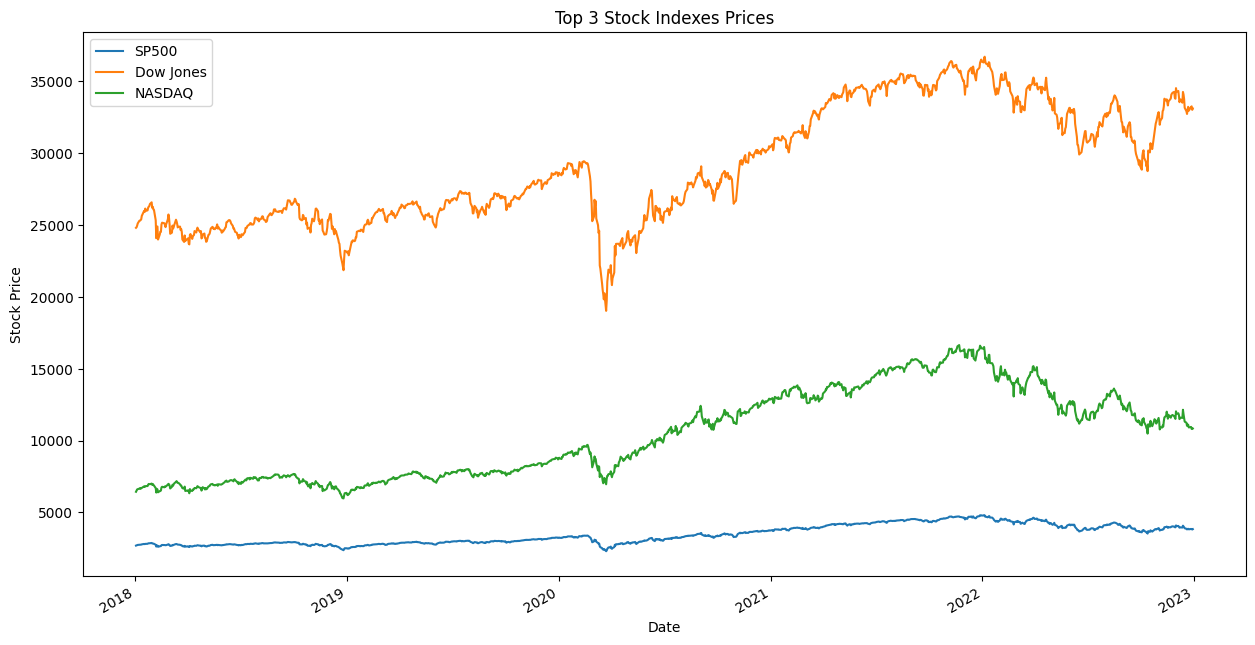

In [3]:
SP500["Open"].plot(label ="SP500", figsize = (15,8))
DJIA["Open"].plot(label ="Dow Jones")
NDX["Open"].plot(label ="NASDAQ")
plt.legend()
plt.title("Top 3 Stock Indexes Prices")
plt.ylabel('Stock Price')
plt.show()

## Volume Visualization

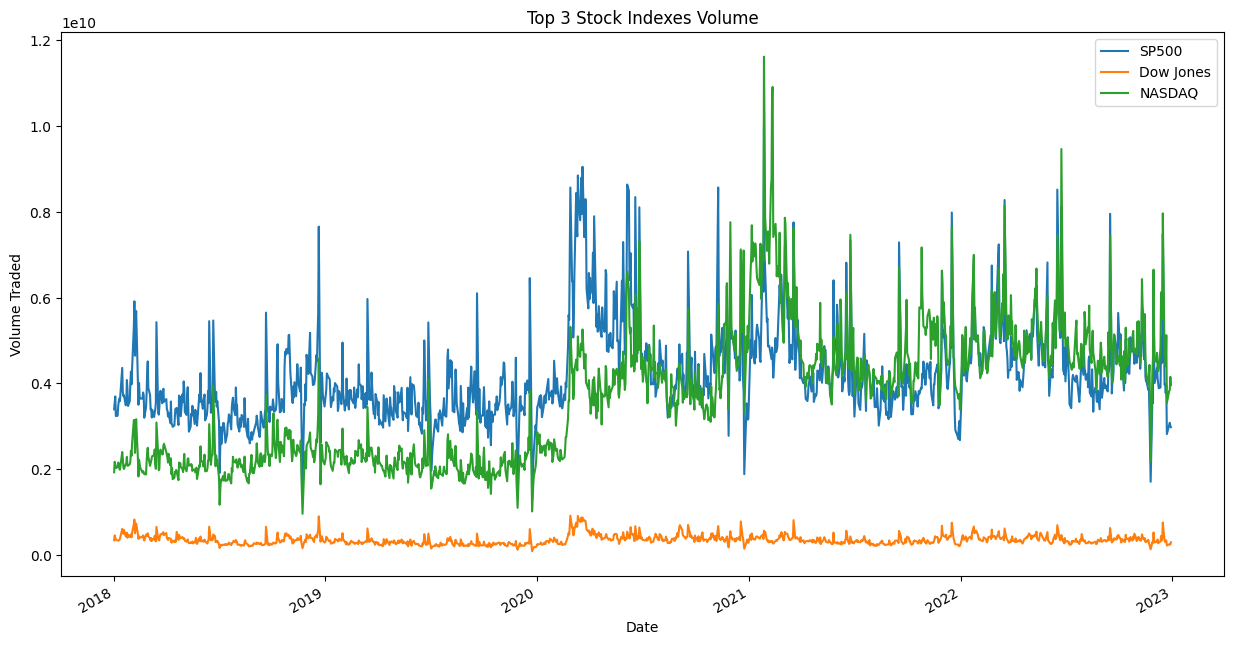

In [4]:
SP500["Volume"].plot(label ="SP500", figsize = (15,8))
DJIA["Volume"].plot(label ="Dow Jones")
NDX["Volume"].plot(label ="NASDAQ")
plt.legend()
plt.title("Top 3 Stock Indexes Volume")
plt.ylabel('Volume Traded')
plt.show()

## Marcket Cap

In [5]:
SP500["Total_Traded"] = SP500["Open"] * SP500["Volume"]
DJIA["Total_Traded"] = DJIA["Open"] * DJIA["Volume"]
NDX["Total_Traded"] = NDX["Open"] * NDX["Volume"]

In [6]:
SP500

,Open,High,Low,Close,Adj Close,Volume,Total_Traded
Date,,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000,9.117785e+12
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000,9.561262e+12
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000,1.005421e+13
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000,8.847543e+12
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000,8.903145e+12
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,1.075586e+13
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,1.164647e+13
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,1.180853e+13


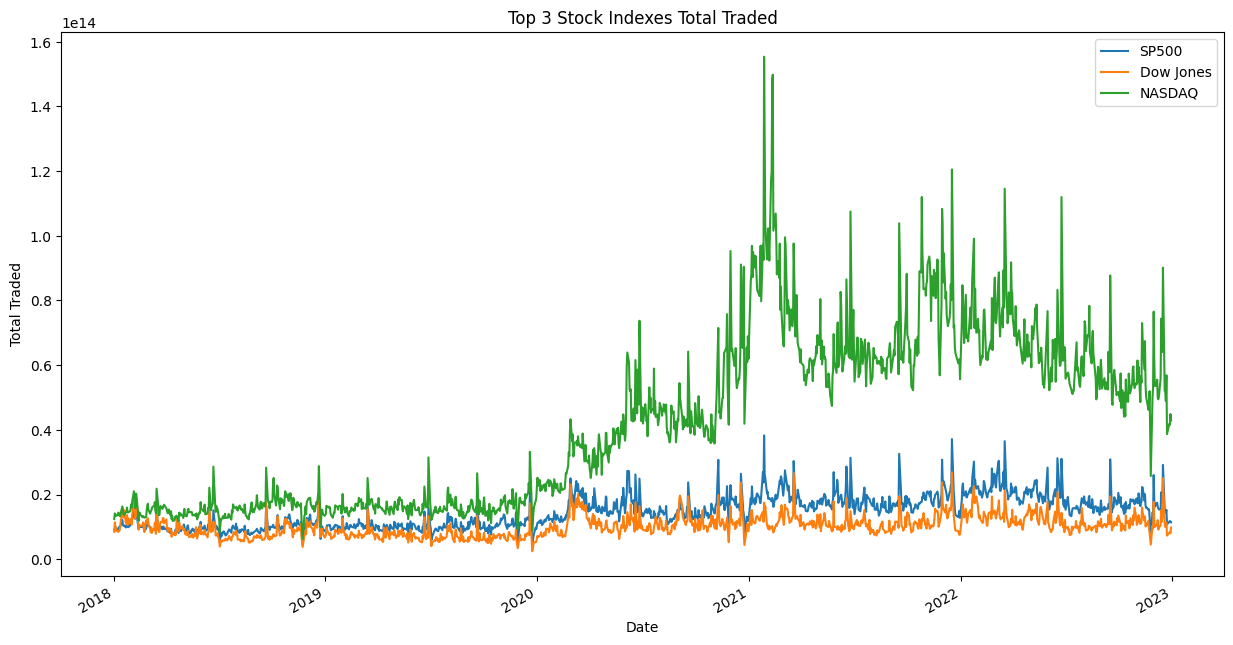

In [7]:
SP500["Total_Traded"].plot(label ="SP500", figsize = (15,8))
DJIA["Total_Traded"].plot(label ="Dow Jones")
NDX["Total_Traded"].plot(label ="NASDAQ")
plt.legend()
plt.title("Top 3 Stock Indexes Total Traded")
plt.ylabel('Total Traded')
plt.show()

In [8]:
# To find highest value in a chart

NDX["Total_Traded"].argmax()

772

In [9]:
NDX.iloc[[NDX["Total_Traded"].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Total_Traded
Date,,,,,,,
2021-01-27,13371.160156,13393.509766,13034.139648,13112.650391,13112.650391,11621190000,1.553888e+14


## Moving Averages

In [10]:
SP500["MA50"] = SP500["Open"].rolling(50).mean()
SP500["MA200"] = SP500["Open"].rolling(200).mean()

DJIA["MA50"] = DJIA["Open"].rolling(50).mean()
DJIA["MA200"] = DJIA["Open"].rolling(200).mean()

NDX["MA50"] = NDX["Open"].rolling(50).mean()
NDX["MA200"] = NDX["Open"].rolling(200).mean()

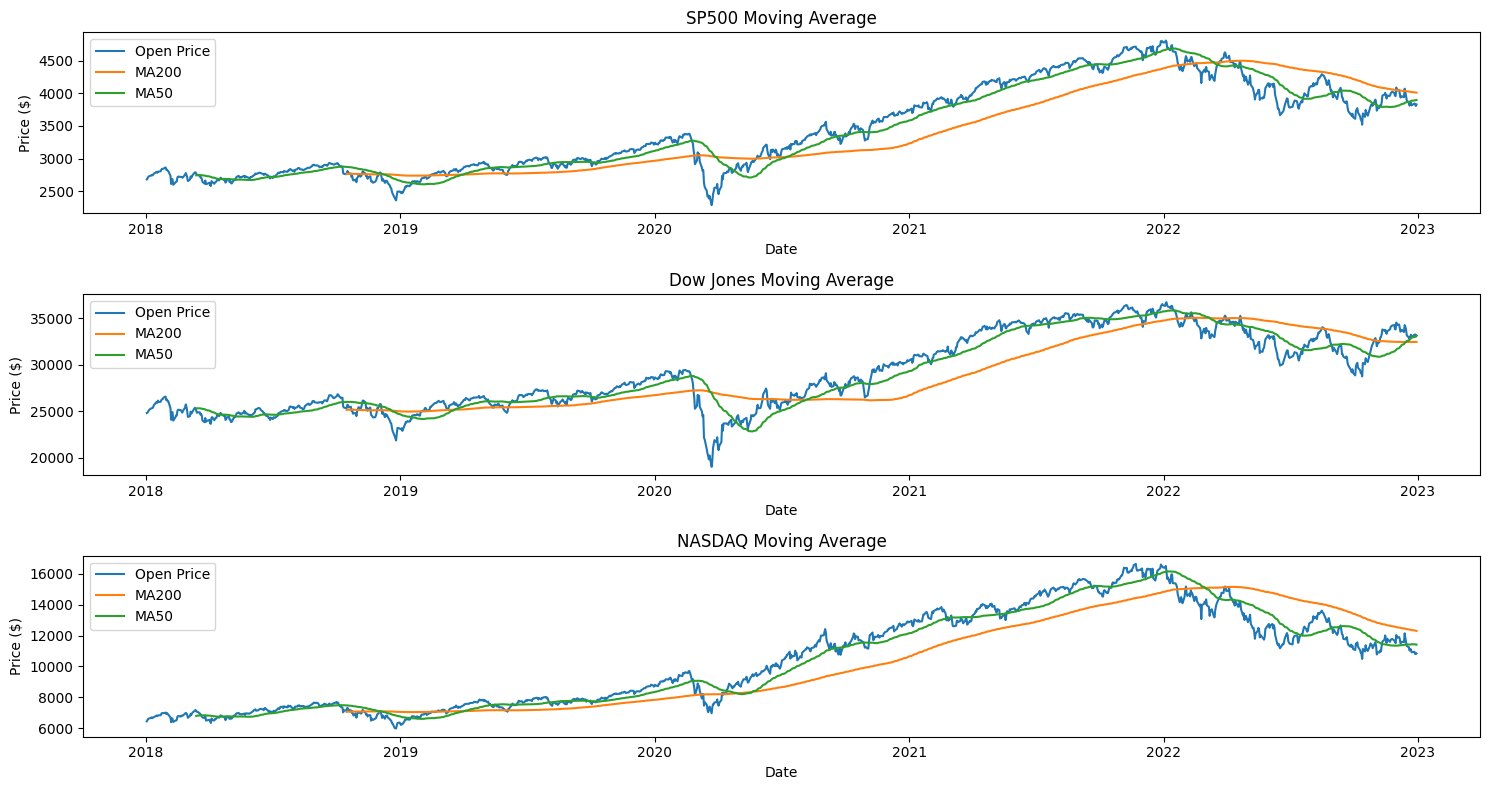

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(15, 8))

axs[0].plot(SP500["Open"],label = "Open Price")
axs[0].plot(SP500["MA200"],label = "MA200")
axs[0].plot(SP500["MA50"],label = "MA50")
axs[0].set_title("SP500 Moving Average")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price ($)")
axs[0].legend()

axs[1].plot(DJIA["Open"],label = "Open Price")
axs[1].plot(DJIA["MA200"],label = "MA200")
axs[1].plot(DJIA["MA50"],label = "MA50")
axs[1].set_title("Dow Jones Moving Average")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Price ($)")
axs[1].legend()

axs[2].plot(NDX["Open"],label = "Open Price")
axs[2].plot(NDX["MA200"],label = "MA200")
axs[2].plot(NDX["MA50"],label = "MA50")
axs[2].set_title("NASDAQ Moving Average")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("Price ($)")
axs[2].legend()

plt.tight_layout()
plt.show()

## Correlation and Scatter Matrix

In [12]:
from pandas.plotting import scatter_matrix
import pandas as pd


In [13]:
stock_indexes = pd.concat([SP500["Open"],DJIA["Open"],NDX["Open"]], axis =1)
stock_indexes.columns = ["SP500 Open","Dow Jones Open", "NASDAQ Open"]


array([[<Axes: xlabel='SP500 Open', ylabel='SP500 Open'>,
        <Axes: xlabel='Dow Jones Open', ylabel='SP500 Open'>,
        <Axes: xlabel='NASDAQ Open', ylabel='SP500 Open'>],
       [<Axes: xlabel='SP500 Open', ylabel='Dow Jones Open'>,
        <Axes: xlabel='Dow Jones Open', ylabel='Dow Jones Open'>,
        <Axes: xlabel='NASDAQ Open', ylabel='Dow Jones Open'>],
       [<Axes: xlabel='SP500 Open', ylabel='NASDAQ Open'>,
        <Axes: xlabel='Dow Jones Open', ylabel='NASDAQ Open'>,
        <Axes: xlabel='NASDAQ Open', ylabel='NASDAQ Open'>]], dtype=object)

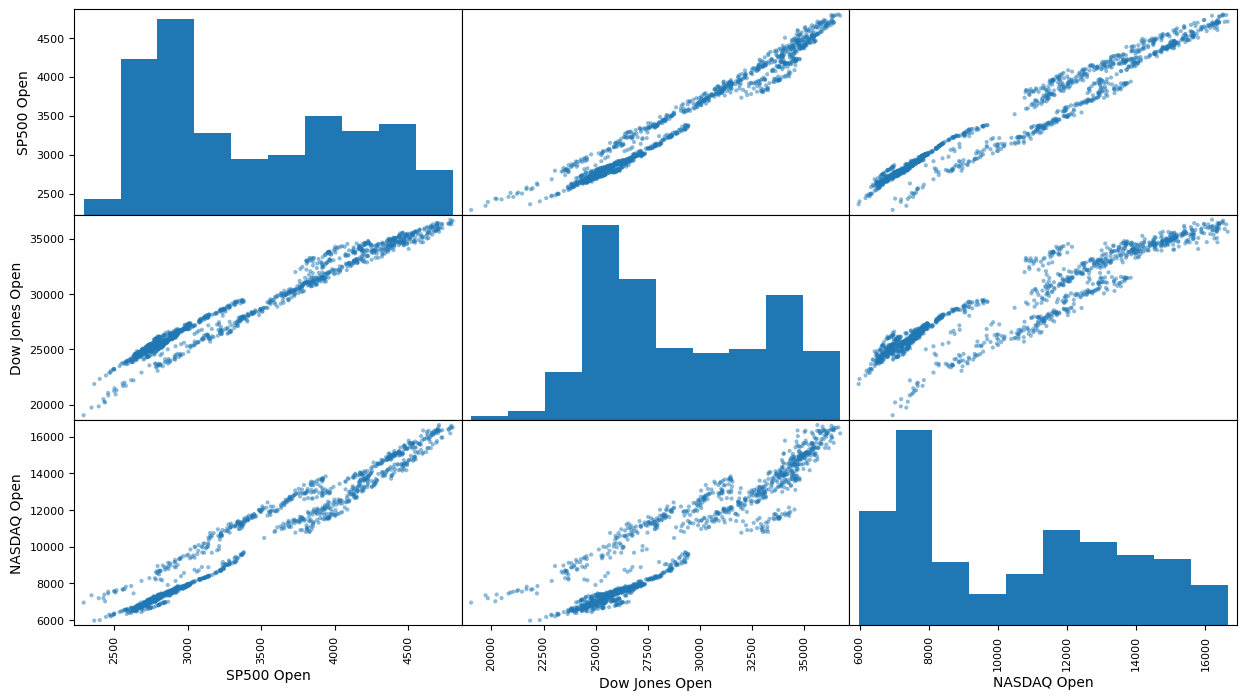

In [14]:
scatter_matrix(stock_indexes,figsize=(15,8))

## Candlesticks

C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


([<matplotlib.lines.Line2D at 0x1bf40a511f0>,
  <matplotlib.patches.Rectangle at 0x1bf40fb5700>])

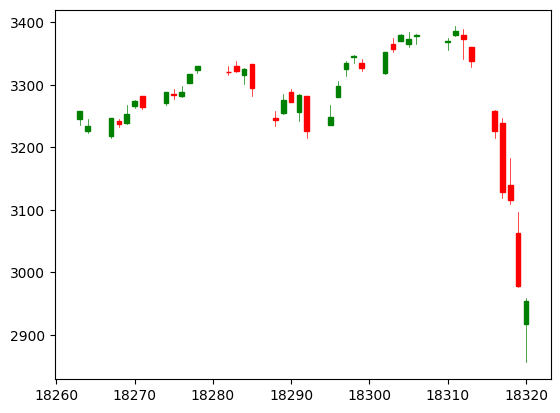

In [15]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

SP500_timeframe = SP500.loc['2020-01':'2020-02'].reset_index()

SP500_timeframe['date_ax'] = SP500_timeframe['Date'].apply(lambda date: date2num(date))
SP500_values =[tuple(vals) for vals in SP500_timeframe[['date_ax', 'Open','High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax, SP500_values, width = 0.6, colorup = 'g', colordown = 'r')

## Daily Percentage Gain


In [16]:
SP500['returns'] = (SP500['Close']/SP500['Close'].shift(1))-1

#  Higher the number the better returns, vice versa for loss

In [17]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,Total_Traded,MA50,MA200,returns
Date,,,,,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000,9.117785e+12,NaN,NaN,NaN
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000,9.561262e+12,NaN,NaN,0.006399
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000,1.005421e+13,NaN,NaN,0.004029
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000,8.847543e+12,NaN,NaN,0.007034
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000,8.903145e+12,NaN,NaN,0.001662


In [18]:
DJIA['returns'] = (DJIA['Close']/DJIA['Close'].shift(1))-1
DJIA.head()

,Open,High,Low,Close,Adj Close,Volume,Total_Traded,MA50,MA200,returns
Date,,,,,,,,,,
2018-01-02,24809.349609,24864.189453,24741.699219,24824.009766,24824.009766,341130000,8.463213e+12,NaN,NaN,NaN
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000,1.135144e+13,NaN,NaN,0.003975
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000,1.006783e+13,NaN,NaN,0.006117
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000,8.991644e+12,NaN,NaN,0.008803
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000,8.640035e+12,NaN,NaN,-0.000509


In [19]:
NDX['returns'] = (NDX['Close']/NDX['Close'].shift(1))-1
NDX.head()

,Open,High,Low,Close,Adj Close,Volume,Total_Traded,MA50,MA200,returns
Date,,,,,,,,,,
2018-01-02,6431.589844,6513.020020,6417.750000,6511.339844,6511.339844,1929700000,1.241104e+13,NaN,NaN,NaN
2018-01-03,6520.029785,6579.250000,6519.259766,6575.799805,6575.799805,2173130000,1.416887e+13,NaN,NaN,0.009900
2018-01-04,6595.750000,6603.169922,6576.919922,6584.580078,6584.580078,2103220000,1.387231e+13,NaN,NaN,0.001335
2018-01-05,6613.129883,6654.979980,6605.029785,6653.290039,6653.290039,2024000000,1.338497e+13,NaN,NaN,0.010435
2018-01-08,6651.680176,6680.319824,6649.200195,6676.629883,6676.629883,2055010000,1.366927e+13,NaN,NaN,0.003508


## Volatility

<Axes: >

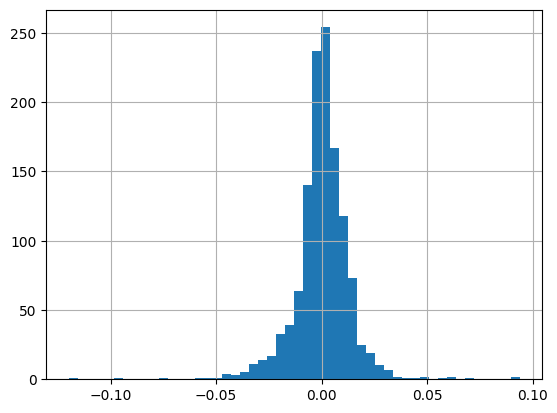

In [20]:
SP500['returns'].hist(bins =50)

#The larger spread, more volatile

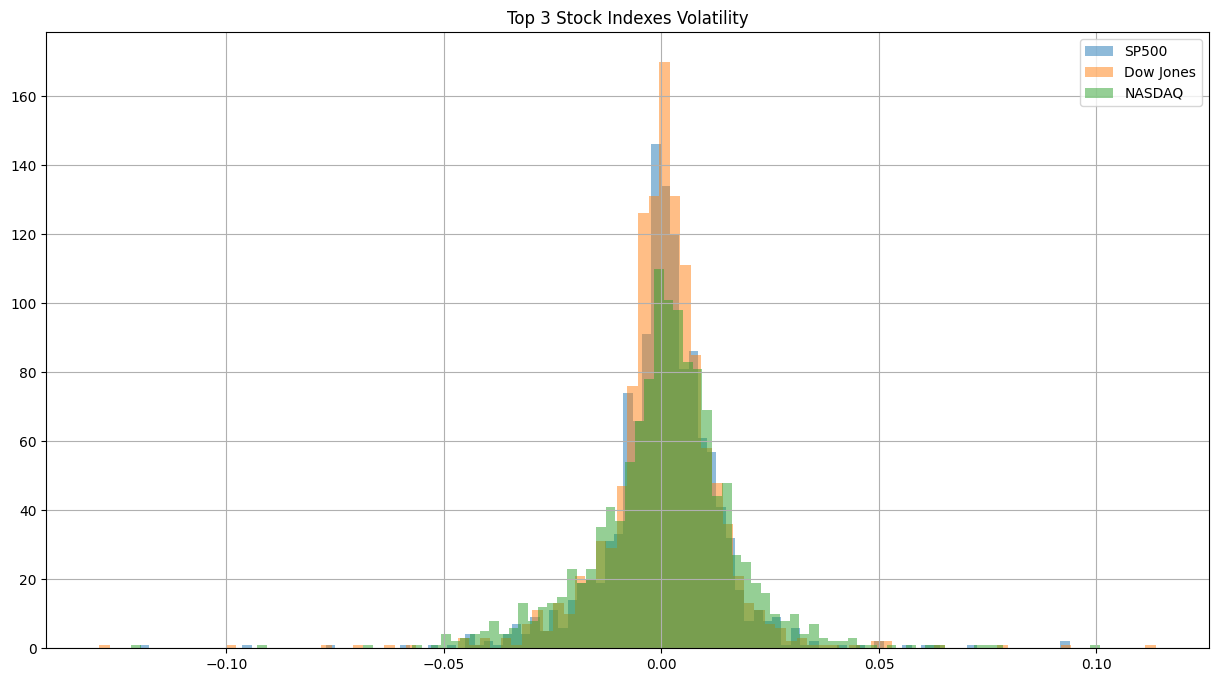

In [21]:
# Combination plot 

SP500['returns'].hist(bins =100,label ='SP500', alpha = 0.5, figsize = (15,8))
DJIA['returns'].hist(bins =100,label = 'Dow Jones', alpha = 0.5)
NDX['returns'].hist(bins =100, label = 'NASDAQ', alpha = 0.5)
plt.title("Top 3 Stock Indexes Volatility")
plt.legend()

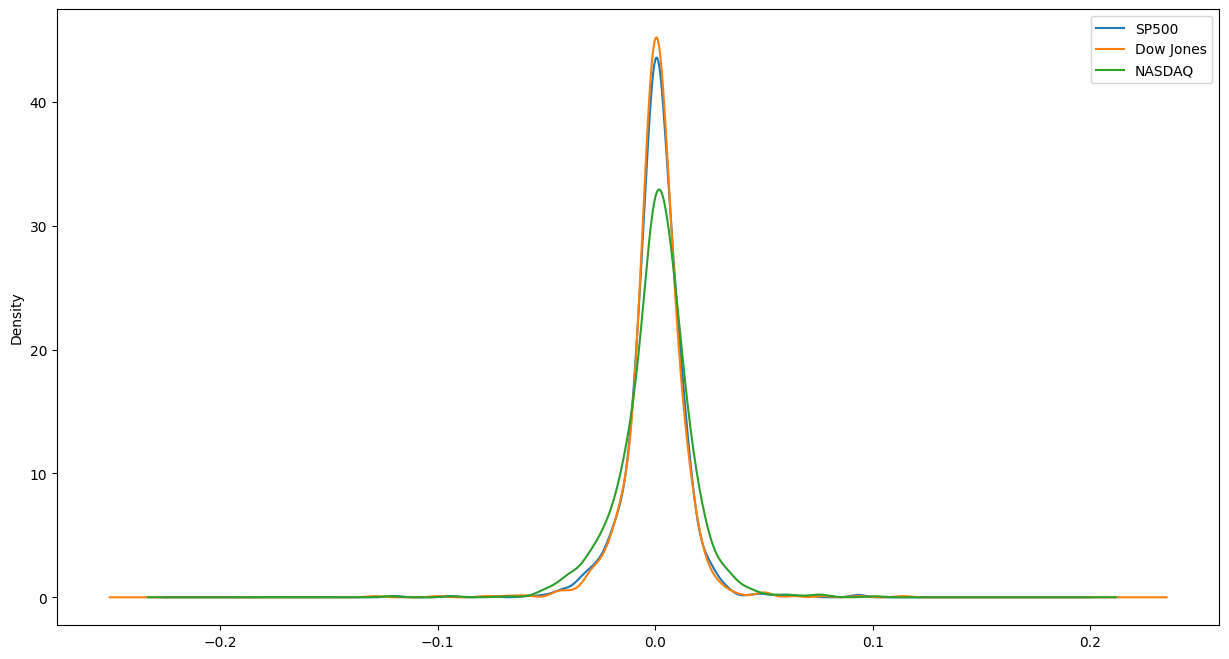

In [22]:
# KDE (Kernel Density Estimate plot) for a smoothen volatility plot

SP500['returns'].plot(kind ='kde', label ='SP500', figsize =(15,8))
DJIA['returns'].plot(kind ='kde', label ='Dow Jones')
NDX['returns'].plot(kind ='kde', label ='NASDAQ')
plt.legend()

# NASDAQ is the most volatile from the histogram and KDE, which has a wider range on the chart

## Cumulative Return


In [23]:
SP500['Cumulative Return'] = (1 +SP500['returns']).cumprod()
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,Total_Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000,9.117785e+12,NaN,NaN,NaN,NaN
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000,9.561262e+12,NaN,NaN,0.006399,1.006399
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000,1.005421e+13,NaN,NaN,0.004029,1.010453
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000,8.847543e+12,NaN,NaN,0.007034,1.017561
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000,8.903145e+12,NaN,NaN,0.001662,1.019252


In [24]:
DJIA['Cumulative Return'] = (1 + DJIA ['returns']).cumprod()
DJIA.head()

,Open,High,Low,Close,Adj Close,Volume,Total_Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2018-01-02,24809.349609,24864.189453,24741.699219,24824.009766,24824.009766,341130000,8.463213e+12,NaN,NaN,NaN,NaN
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000,1.135144e+13,NaN,NaN,0.003975,1.003975
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000,1.006783e+13,NaN,NaN,0.006117,1.010116
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000,8.991644e+12,NaN,NaN,0.008803,1.019008
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000,8.640035e+12,NaN,NaN,-0.000509,1.018490


In [25]:
NDX['Cumulative Return'] = (1 + NDX ['returns']).cumprod()
NDX.head()

,Open,High,Low,Close,Adj Close,Volume,Total_Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2018-01-02,6431.589844,6513.020020,6417.750000,6511.339844,6511.339844,1929700000,1.241104e+13,NaN,NaN,NaN,NaN
2018-01-03,6520.029785,6579.250000,6519.259766,6575.799805,6575.799805,2173130000,1.416887e+13,NaN,NaN,0.009900,1.009900
2018-01-04,6595.750000,6603.169922,6576.919922,6584.580078,6584.580078,2103220000,1.387231e+13,NaN,NaN,0.001335,1.011248
2018-01-05,6613.129883,6654.979980,6605.029785,6653.290039,6653.290039,2024000000,1.338497e+13,NaN,NaN,0.010435,1.021800
2018-01-08,6651.680176,6680.319824,6649.200195,6676.629883,6676.629883,2055010000,1.366927e+13,NaN,NaN,0.003508,1.025385


Text(0.5, 1.0, 'Cumulative Return in Time')

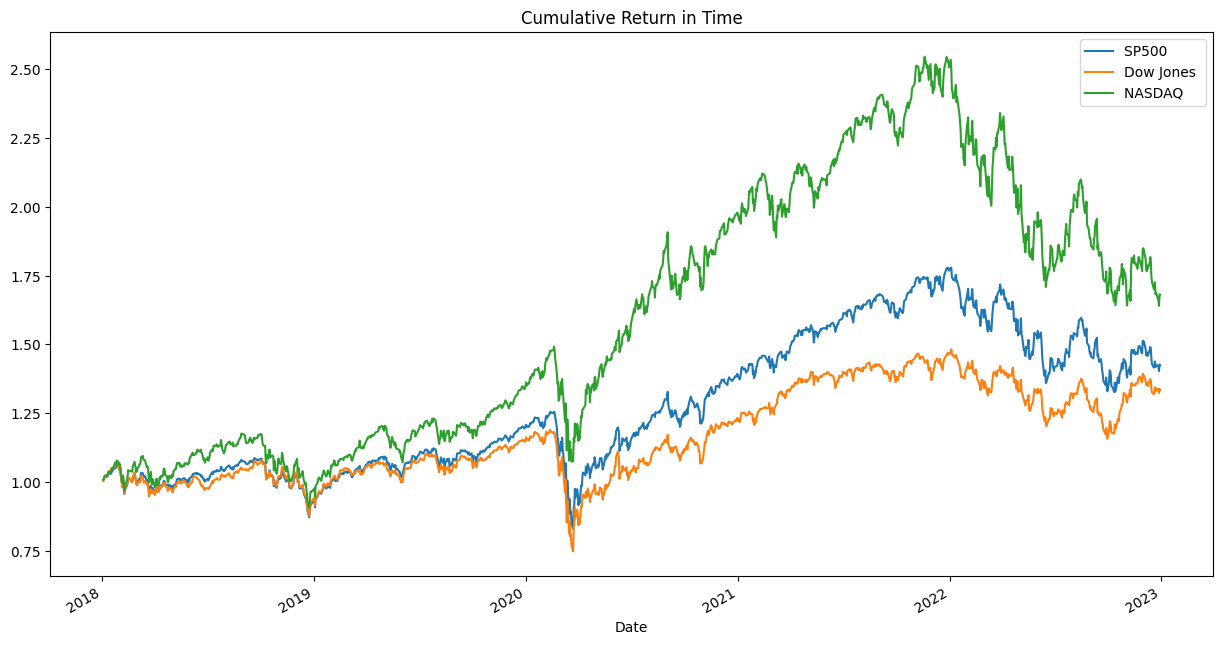

In [26]:
SP500['Cumulative Return'].plot(label = "SP500 ", figsize =(15,8))
DJIA['Cumulative Return'].plot(label = "Dow Jones ")
NDX['Cumulative Return'].plot(label = "NASDAQ ")
                              
plt.legend()
plt.title("Cumulative Return in Time")